# Pitney Bowes Data Challenge
# Team 14

## By:
David Lado​ (david.lado1@baruchmail.cuny.edu)

Syed Hossain​ (syed.hossain3@baruchmail.cuny.edu)

Victoria Vayner​ (victoria.vayner@baruchmail.cuny.edu)

Daniel Rubens​ (daniel.rubens@baruchmail.cuny.edu)

Immanuel Ryan Augustine​ (immanuel.augustine@baruchmail.cuny.edu)

### Import Packages

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.ensemble import RandomForestClassifier
!pip install lime
from lime import lime_tabular


     |████████████████████████████████| 276kB 8.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=f0fb854a6b42b6fa2f514393bd814d6ff63fdc77a18c86e2ae2a41b9ecd5ac56
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


### Open Files, Create DataFrames, Zero Null Values
#### *To keep nulls, comment 3rd var, remove "n" from dataframe var.

In [7]:
url = 'https://raw.githubusercontent.com/vikivayner/Data-Challenge-Team-14/main/test.csv'
test = pd.read_csv(url)
tsn = pd.DataFrame(test)
ts = tsn.fillna(0)

url2 = 'https://raw.githubusercontent.com/vikivayner/Data-Challenge-Team-14/main/train.csv'

train = pd.read_csv(url2)
trn = pd.DataFrame(train)
tr = trn.fillna(0)

### Convert "LastRecord" and "Date Deployed" to Datetime

In [8]:
ts["LastRecord"], ts["Date Deployed"] = pd.to_datetime(ts["LastRecord"]), pd.to_datetime(ts["Date Deployed"])
tr["LastRecord"], tr["Date Deployed"] = pd.to_datetime(tr["LastRecord"]), pd.to_datetime(tr["Date Deployed"])

### Create "DaysInService" Column, Convert from TimeDelta to Float for Plotting

In [9]:
ts["DaysInService"] = ts["LastRecord"] - ts["Date Deployed"]
ts["DaysInService"] = ts["DaysInService"].dt.days.astype("float64")
tr["DaysInService"] = tr["LastRecord"] - tr["Date Deployed"]
tr["DaysInService"] = tr["DaysInService"].dt.days.astype("float64")

### Get Info and Head (Raw Df)

In [10]:
#ts.info()
#ts.head()

tr.info()
tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   deviceid                     40500 non-null  int64         
 1   avg_time_charging_lag1       40500 non-null  float64       
 2   avg_time_charging_lag2       40500 non-null  float64       
 3   avg_time_charging_lag3       40500 non-null  float64       
 4   avg_time_charging_lag7       40500 non-null  float64       
 5   charging_rate_lag3           40500 non-null  float64       
 6   charging_rate_lag7           40500 non-null  float64       
 7   avg_time_discharging_lag1    40500 non-null  float64       
 8   avg_time_discharging_lag2    40500 non-null  float64       
 9   avg_time_discharging_lag3    40500 non-null  float64       
 10  avg_time_discharging_lag7    40500 non-null  float64       
 11  discharging_rate_lag3        40500 non-nu

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,DaysInService
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,2021-04-01,2019-10-06,543.0
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,0.00,0.00,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,2021-04-01,2019-10-27,522.0
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,2021-04-01,2019-10-31,518.0
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,2021-04-01,2019-10-01,548.0
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,2021-04-01,2019-09-13,566.0


### Count Null Values
#### *Keep nulls above to observe progressive linearity.

In [11]:
#ts.isnull().sum()
#tr.isnull().sum()

### Plot Distributions of DataFrame Columns
#### *no plot for "deviceid" (irrelevant) or "charge_cycle_time_below_12" (bool)
#### **uncomment to run

In [12]:
"""
for col in ts.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = ts[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

"""
for col in tr.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = tr[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

'\nfor col in tr.columns[1:]:\n    if col != "charge_cycle_time_below_12":\n        hist = tr[col].hist(bins=10)\n        print("Plot for column "{}"".format(col))\n        plt.show()\n'

### Create New DataFrame, Removing Columns Without Outliers

In [13]:
columns = [column for column in ts.columns if ts[column].dtype == "float64"]
tsno = ts[columns]

columns = [column for column in tr.columns if tr[column].dtype == "float64"]
trno = tr[columns]

### Convert Outliers by Quantile to Null in New DataFrame.

In [14]:
q_low = tsno[columns].quantile(0.01)
q_hi  = tsno[columns].quantile(0.99)

ts0 = tsno[(tsno[columns] < q_hi) & (tsno[columns] > q_low)]

#ts0.info()
#ts0.head()

q_low = trno[columns].quantile(0.01)
q_hi  = trno[columns].quantile(0.99)

tr0 = trno[(trno[columns] < q_hi) & (trno[columns] > q_low)]

#tr0.info()
#tr0.head()

### Count New OUTLIER Null Values

In [15]:
#ts0.isnull().sum()
#tr0.isnull().sum()

### Plot New DataFrame Outlier Nulls

In [16]:
"""
for col in ts0.columns:
    hist = ts0[col].hist(bins=100)
    print("Plot for column \"{}\"".format(col))
    plt.show()
"""

"""
for col in tr0.columns:
    hist = tr0[col].hist(bins=100)
    print("Plot for column \"{}\"".format(col))
    plt.show()
"""

'\nfor col in tr0.columns:\n    hist = tr0[col].hist(bins=100)\n    print("Plot for column "{}"".format(col))\n    plt.show()\n'

### Rebuild DataFrames WITH Outlier Nulls for Feature Importance
#### *Adding ints, bools, and datetimes from original df.  Uncomment to zero nulls.

In [17]:
tso = ts[["deviceid", "charge_cycle_time_below_12", "LastRecord", "Date Deployed"]]
frames = [tso, ts0]
ts1 = pd.concat(frames, axis=1)
ts1 = ts1.fillna(0)

#ts1.info()
#ts1.info()

tro = tr[["deviceid", "fail_7", "charge_cycle_time_below_12", "LastRecord", "Date Deployed"]]
frames = [tr0, tro]
tr1 = pd.concat(frames, axis=1)
tr1 = tr1.fillna(0)

tr1.info()
tr1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   avg_time_charging_lag1       40500 non-null  float64       
 1   avg_time_charging_lag2       40500 non-null  float64       
 2   avg_time_charging_lag3       40500 non-null  float64       
 3   avg_time_charging_lag7       40500 non-null  float64       
 4   charging_rate_lag3           40500 non-null  float64       
 5   charging_rate_lag7           40500 non-null  float64       
 6   avg_time_discharging_lag1    40500 non-null  float64       
 7   avg_time_discharging_lag2    40500 non-null  float64       
 8   avg_time_discharging_lag3    40500 non-null  float64       
 9   avg_time_discharging_lag7    40500 non-null  float64       
 10  discharging_rate_lag3        40500 non-null  float64       
 11  discharging_rate_lag7        40500 non-nu

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,DaysInService,deviceid,fail_7,charge_cycle_time_below_12,LastRecord,Date Deployed
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,4.99,5.85,24.35,31.02,43.42,79.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,543.0,28647,0,False,2021-04-01,2019-10-06
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,0.00,0.00,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,522.0,36175,0,False,2021-04-01,2019-10-27
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,518.0,16107,0,False,2021-04-01,2019-10-31
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,548.0,27362,0,False,2021-04-01,2019-10-01
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,566.0,19463,0,True,2021-04-01,2019-09-13


(40500, 56)

## Dummy Coding

In [19]:
tr1.dtypes

avg_time_charging_lag1                float64
avg_time_charging_lag2                float64
avg_time_charging_lag3                float64
avg_time_charging_lag7                float64
charging_rate_lag3                    float64
charging_rate_lag7                    float64
avg_time_discharging_lag1             float64
avg_time_discharging_lag2             float64
avg_time_discharging_lag3             float64
avg_time_discharging_lag7             float64
discharging_rate_lag3                 float64
discharging_rate_lag7                 float64
avg_time_charging_lag4                float64
avg_time_discharging_lag4             float64
avg_time_charging_lag5                float64
avg_time_discharging_lag5             float64
avg_time_charging_lag6                float64
avg_time_discharging_lag6             float64
avg_time_charging_lag8                float64
avg_time_discharging_lag8             float64
avg_time_charging_lag9                float64
avg_time_discharging_lag9         

In [20]:
tr1 = pd.get_dummies(tr,drop_first=True,prefix_sep='_') 
tr1.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [21]:
predictors = ['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time',
       'DaysInService']
outcome = 'fail_7'

In [22]:
X = tr1[predictors]
y = tr1[outcome]
X.shape

(40500, 52)

In [23]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [24]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear',class_weight = 'balanced')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))

                                coeff
avg_time_charging_lag1       0.014018
avg_time_charging_lag2       0.012708
avg_time_charging_lag3       0.008388
avg_time_charging_lag7       0.016211
charging_rate_lag3           0.065039
charging_rate_lag7          -0.019600
avg_time_discharging_lag1   -0.007825
avg_time_discharging_lag2   -0.006459
avg_time_discharging_lag3   -0.003772
avg_time_discharging_lag7   -0.007735
discharging_rate_lag3        0.094688
discharging_rate_lag7       -0.004363
charge_cycle_time_below_12   1.679705
avg_time_charging_lag4       0.004803
avg_time_discharging_lag4   -0.001204
avg_time_charging_lag5       0.009172
avg_time_discharging_lag5   -0.003508
avg_time_charging_lag6       0.013555
avg_time_discharging_lag6   -0.006306
avg_time_charging_lag8       0.009965
avg_time_discharging_lag8   -0.004074
avg_time_charging_lag9       0.007931
avg_time_discharging_lag9   -0.003721
avg_time_charging_lag10      0.008072
avg_time_discharging_lag10  -0.002896
avg_time_cha

charge_cycle_time_below_12 is the most important feature in this model. avg_time_charging and avg_time_discharging are the next most important features.

### Model Metrics

In [26]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6140)

       Prediction
Actual     0     1
     0 12120  9642
     1  1302  5286
Confusion Matrix (Accuracy 0.6071)

       Prediction
Actual    0    1
     0 5125 4212
     1  562 2251


In [27]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
lr_prediction_train = logit_reg.predict_proba(train_X)[:,1] > 0.5
lr_prediction_valid = logit_reg.predict_proba(valid_X)[:,1] > 0.5
print("Accuracy on train is:",accuracy_score(train_y,lr_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,lr_prediction_valid))
print("Precision_score train is:",precision_score(train_y,lr_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,lr_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,lr_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,lr_prediction_valid))
print("f1_score on train is:",f1_score(train_y,lr_prediction_train))
print("f1_score on test is:",f1_score(valid_y,lr_prediction_valid))

Accuracy on train is: 0.6139682539682539
Accuracy on test is: 0.6070781893004116
Precision_score train is: 0.3540996784565916
Precision_score on test is: 0.3482902676775491
Recall_score on train is: 0.802367941712204
Recall_score on test is: 0.8002132954141487
f1_score on train is: 0.49135527049637484
f1_score on test is: 0.4853385079775765


Recall is higher than other metrics for the logistric regression model. Precision is relatively low.

## Decision Tree

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

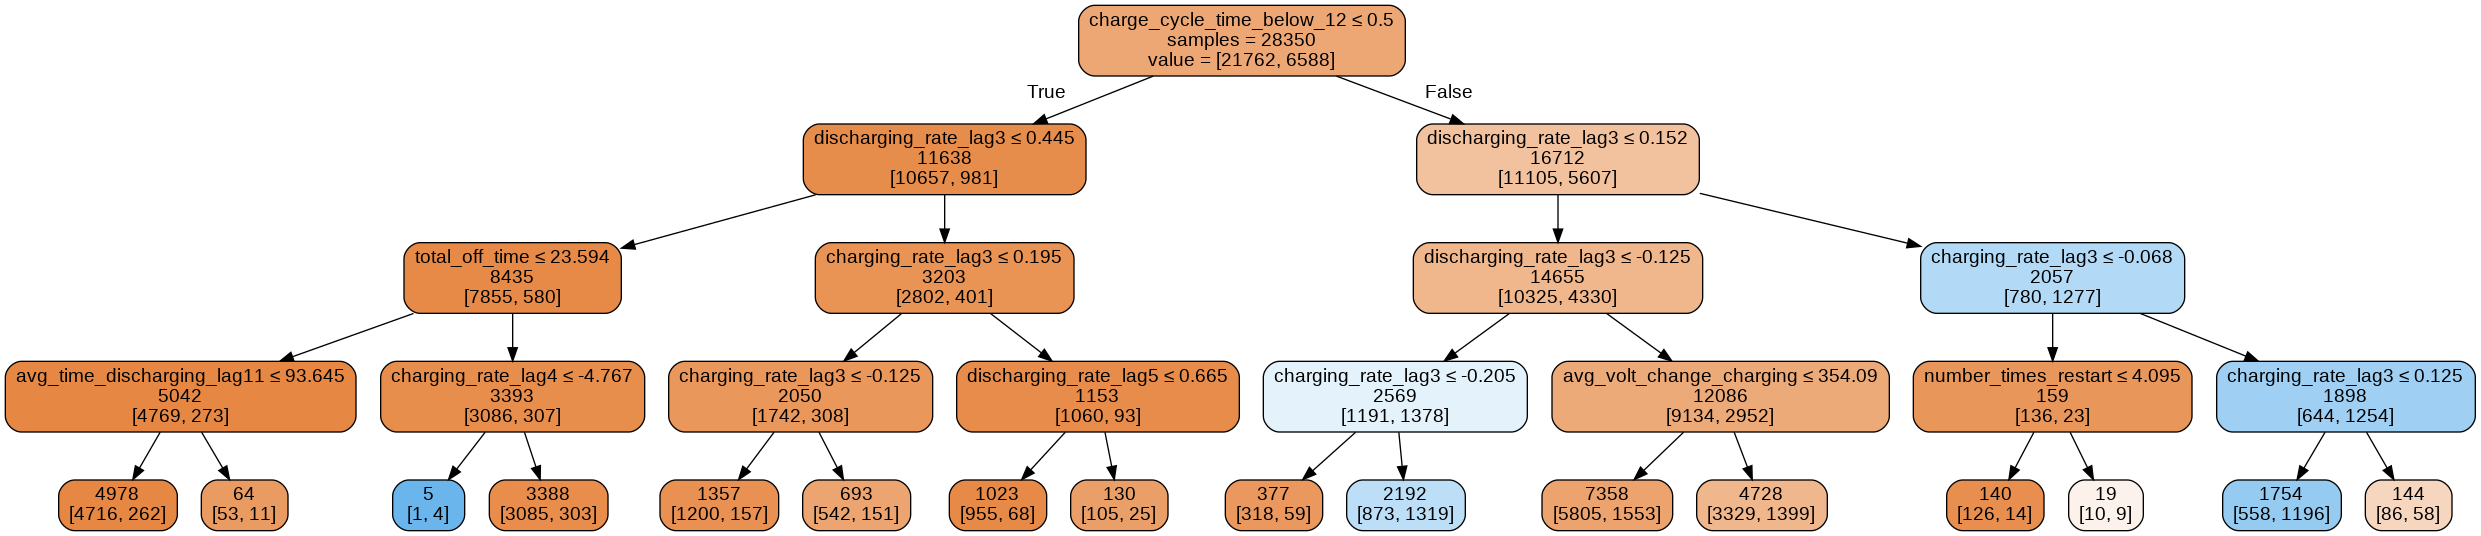

In [29]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

### Feature Importance

In [30]:
importances = DecisionTree.feature_importances_

im = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
im = im.sort_values('importance',ascending=False)
print(im)

                        feature  importance
12   charge_cycle_time_below_12    0.448823
10        discharging_rate_lag3    0.393047
4            charging_rate_lag3    0.126021
44     avg_volt_change_charging    0.021475
42               total_off_time    0.002776
37           charging_rate_lag4    0.002613
43         number_times_restart    0.002422
34        discharging_rate_lag5    0.001893
26   avg_time_discharging_lag11    0.000931
45  avg_volt_change_discharging    0.000000
46            avg_time_charging    0.000000
30   avg_time_discharging_lag13    0.000000
31      avg_time_charging_lag14    0.000000
32   avg_time_discharging_lag14    0.000000
33        discharging_rate_lag4    0.000000
50                   cycle_time    0.000000
35        discharging_rate_lag6    0.000000
36        discharging_rate_lag8    0.000000
49                   piececount    0.000000
38           charging_rate_lag5    0.000000
39           charging_rate_lag6    0.000000
40                 chargecycles 

### Model Metrics

In [31]:
dt_prediction_train = DecisionTree.predict(train_X) 
dt_prediction_valid = DecisionTree.predict(valid_X) 
    
print("Accuracy score on train is:",accuracy_score(train_y,dt_prediction_train))
print("Accuracy score on test is:",accuracy_score(valid_y,dt_prediction_valid))
print("Precision score on train is:",precision_score(train_y,dt_prediction_train))
print("Precision score on test is:",precision_score(valid_y,dt_prediction_valid))
print("Recall score on train is:",recall_score(train_y,dt_prediction_train))
print("Recall score on test is:",recall_score(valid_y,dt_prediction_valid))
print("F1 score on train is:",f1_score(train_y,dt_prediction_train))
print("F1 score on test is:",f1_score(valid_y,dt_prediction_valid))

Accuracy score on train is: 0.8059611992945326
Accuracy score on test is: 0.8052674897119342
Precision score on train is: 0.6375601113642116
Precision score on test is: 0.6310850439882698
Recall score on train is: 0.3823618700667881
Recall score on test is: 0.3825097760398151
F1 score on train is: 0.478033969067274
F1 score on test is: 0.4763169544046038


Accuracy is higher than other metrics for the decision tree model. Recall is relatively low.

## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

# predict probabilities
prediction_train = nb.predict_proba(train_X)
prediction_valid = nb.predict_proba(valid_X)

### Model Metrics

In [33]:
nb_prediction_train = nb.predict(train_X) 
nb_prediction_valid = nb.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,nb_prediction_train)) 
print("Accuracy on test is:",accuracy_score(valid_y,nb_prediction_valid)) 
print("Precision_score train is:",precision_score(train_y,nb_prediction_train)) 
print("Precision_score on test is:",precision_score(valid_y,nb_prediction_valid)) 
print("Recall_score on train is:",recall_score(train_y,nb_prediction_train)) 
print("Recall_score on test is:",recall_score(valid_y,nb_prediction_valid)) 
print("f1_score on train is:",f1_score(train_y,nb_prediction_train)) 
print("f1_score on test is:",f1_score(valid_y,nb_prediction_valid))

Accuracy on train is: 0.62
Accuracy on test is: 0.6149794238683127
Precision_score train is: 0.34651213966111644
Precision_score on test is: 0.3426160337552743
Recall_score on train is: 0.7170613236187007
Recall_score on test is: 0.7216494845360825
f1_score on train is: 0.4672370308095545
f1_score on test is: 0.46463721675440606


Recall is higher than other metrics for the naive bayes model. Precision is relatively low.

## Random Forest

In [34]:
rf = RandomForestClassifier(random_state=0)
cc_rf = rf.fit(train_X.values, train_y.values.ravel())

In [35]:
rf_prediction_train = cc_rf.predict(train_X)
rf_prediction_valid = cc_rf.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,rf_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,rf_prediction_valid))
print("Precision_score train is:",precision_score(train_y,rf_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,rf_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,rf_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,rf_prediction_valid))
print("f1_score on train is:",f1_score(train_y,rf_prediction_train))
print("f1_score on test is:",f1_score(valid_y,rf_prediction_valid))

Accuracy on train is: 1.0
Accuracy on test is: 0.7978600823045268
Precision_score train is: 1.0
Precision_score on test is: 0.7035347776510832
Recall_score on train is: 1.0
Recall_score on test is: 0.21933878421613937
f1_score on train is: 1.0
f1_score on test is: 0.3344173441734417


There's an overfitting problem in this model since all scores from training set, which are close to 100%, are much higher than ones from test set.

## Gradient Boosted Trees

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(train_X, train_y)
gbm.predict(valid_X[:2])

array([0, 0])

### Feature Importance

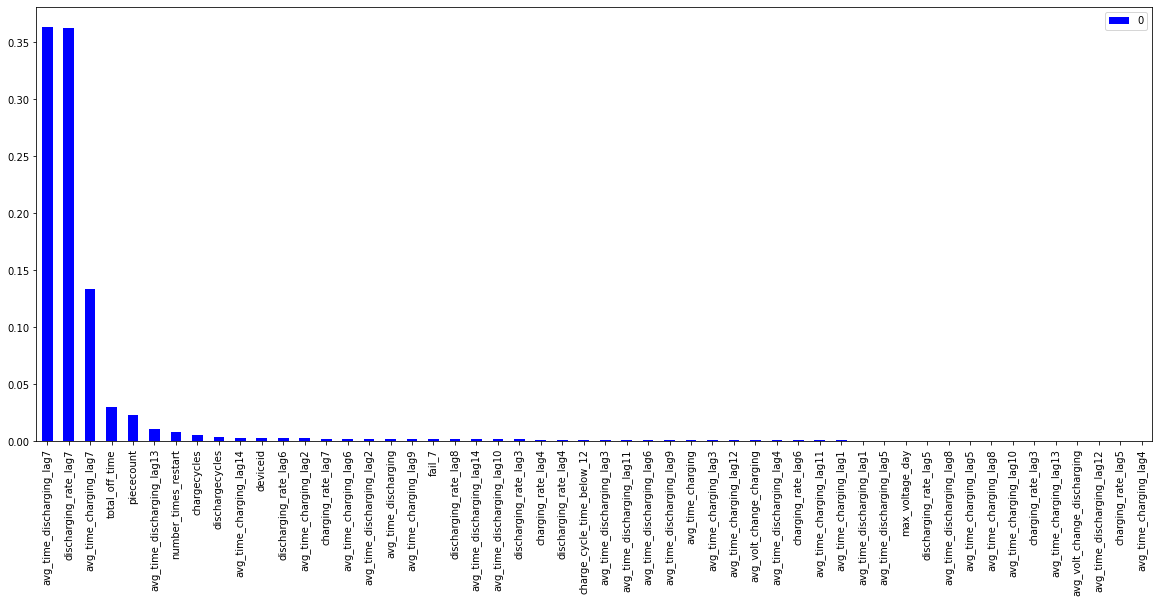

In [37]:
importances = list(zip(gbm.feature_importances_, tr.columns))
pd.DataFrame(importances, index=[x for (_,x) in importances]).sort_values(by = 0, ascending = False).plot(kind = 'bar', color = 'b', figsize=(20,8) )

Most important feature is discharging_rate_lag3

### Model Metrics

In [38]:
gbt_prediction_train = gbm.predict(train_X)
gbt_prediction_valid = gbm.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,gbt_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,gbt_prediction_valid))
print("Precision_score train is:",precision_score(train_y,gbt_prediction_train))
print("Precision_score on test is:",precision_score(valid_y,gbt_prediction_valid))
print("Recall_score on train is:",recall_score(train_y,gbt_prediction_train))
print("Recall_score on test is:",recall_score(valid_y,gbt_prediction_valid))
print("f1_score on train is:",f1_score(train_y,gbt_prediction_train))
print("f1_score on test is:",f1_score(valid_y,gbt_prediction_valid))

Accuracy on train is: 0.8185537918871252
Accuracy on test is: 0.8137448559670782
Precision_score train is: 0.7053469852104665
Precision_score on test is: 0.6816380449141347
Recall_score on train is: 0.37644201578627806
Recall_score on test is: 0.3668681123355848
f1_score on train is: 0.49089469517022954
f1_score on test is: 0.4770048532470534


Accuracy is higher than other metrics for the gradient boosted tree model. Recall is relatively low.

# Neural Network

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X)
X_scale.shape

(40500, 52)

In [40]:
y_tr = tr[[outcome]] # for neural network only because this model need to get y_df.shape[1]
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y_tr, test_size=0.3, random_state=1) 

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model2 = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)])

In [43]:
model2.compile(optimizer= tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [44]:
model2.fit(train_X_nn, train_y_nn, epochs = 15)

Epoch 1/15
886/886 [==============================] - 5s 2ms/step - loss: 0.5122 - accuracy: 0.7651
Epoch 2/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4912 - accuracy: 0.7673
Epoch 3/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4861 - accuracy: 0.7697
Epoch 4/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4920 - accuracy: 0.7663
Epoch 5/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4875 - accuracy: 0.7688
Epoch 6/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4829 - accuracy: 0.7723
Epoch 7/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4867 - accuracy: 0.7678
Epoch 8/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4892 - accuracy: 0.7659
Epoch 9/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4872 - accuracy: 0.7684
Epoch 10/15
886/886 [==============================] - 2s 2ms/step - loss: 0.4838 - accuracy: 0.7681

In [45]:
model2.evaluate(valid_X_nn, valid_y_nn)

380/380 [==============================] - 1s 2ms/step - loss: 0.4914 - accuracy: 0.7649


[0.49143144488334656, 0.7648559808731079]

In [46]:
y_pred_valid = model2.predict(valid_X_nn).ravel()
y_pred = model2.predict(train_X_nn).ravel()

# Model Metrics

In [47]:
# predict probabilities for test set
prediction_probs = model2.predict(valid_X_nn)
# predict classes
nn_prediction_train = (model2.predict(train_X_nn) > 0.5).astype("int32")
nn_prediction_valid = (model2.predict(valid_X_nn) > 0.5).astype("int32")

print("Accuracy on train is:",accuracy_score(train_y_nn,nn_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y_nn,nn_prediction_valid))
print("Precision_score train is:",precision_score(train_y_nn,nn_prediction_train))
print("Precision_score on test is:",precision_score(valid_y_nn,nn_prediction_valid))
print("Recall_score on train is:",recall_score(train_y_nn,nn_prediction_train))
print("Recall_score on test is:",recall_score(valid_y_nn,nn_prediction_valid))
print("f1_score on train is:",f1_score(train_y_nn,nn_prediction_train))
print("f1_score on test is:",f1_score(valid_y_nn,nn_prediction_valid))

Accuracy on train is: 0.7692063492063492
Accuracy on test is: 0.7648559670781893
Precision_score train is: 0.5154639175257731
Precision_score on test is: 0.4681159420289855
Recall_score on train is: 0.11384335154826958
Recall_score on test is: 0.11482403128332741
f1_score on train is: 0.1864975755315181
f1_score on test is: 0.18441335997716243


## Baseline AUC

In [48]:
from sklearn.metrics import roc_curve, auc
# LR
fpr, tpr, thresholds = roc_curve(train_y,lr_prediction_train)
print("LogisticRegression Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,lr_prediction_valid)
print("LogisticRegression Valid: ",str(auc(fpr, tpr)),"\n")
# DT
fpr, tpr, thresholds = roc_curve(train_y,dt_prediction_train)
print("DecisionTree Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,dt_prediction_valid)
print("DecisionTree Valid: ",str(auc(fpr, tpr)),"\n")
# NB
fpr, tpr, thresholds = roc_curve(train_y,nb_prediction_train)
print("NaiveBayes Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,nb_prediction_valid)
print("NaiveBayes Valid: ",str(auc(fpr, tpr)),"\n")
# RF
fpr, tpr, thresholds = roc_curve(train_y,rf_prediction_train)
print("RandomForest Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,rf_prediction_valid)
print("RandomForest Valid: ",str(auc(fpr, tpr)),"\n")
# GBT
fpr, tpr, thresholds = roc_curve(train_y,gbt_prediction_train )
print("GradientBoostedTree Train: ",str(auc(fpr, tpr)))
fpr, tpr, thresholds = roc_curve(valid_y,gbt_prediction_valid)
print("GradientBoostedTree Valid: ",str(auc(fpr, tpr)),"\n")
# NN
fpr, tpr, thresholds = roc_curve(train_y_nn, y_pred)
print("NeuralNetworks Train: ",str(auc(fpr, tpr)))
#fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
fpr, tpr, thresholds = roc_curve(valid_y_nn, y_pred_valid)
print("NeuralNetworkss Valid: ",str(auc(fpr, tpr)),"\n")



LogisticRegression Train:  0.679651023516703
LogisticRegression Valid:  0.6745524011610746 

DecisionTree Train:  0.6582795472932965
DecisionTree Valid:  0.6575716921325775 

NaiveBayes Train:  0.6538389974402666
NaiveBayes Valid:  0.6522459696430011 

RandomForest Train:  1.0
RandomForest Valid:  0.5957462904694277 

GradientBoostedTree Train:  0.6644180486063087
GradientBoostedTree Valid:  0.657622767745387 

NeuralNetworks Train:  0.7291449358844623
NeuralNetworkss Valid:  0.7140937204561466 



In [49]:
## ROC Curve Analysis

In [50]:
rf_proba = cc_rf.predict_proba(valid_X)[:,1]
rf_roc = roc_curve(valid_y, rf_proba)
rf_roc = pd.DataFrame(rf_roc)
gbm_proba=gbm.predict_proba(valid_X)[:,1]
gbm_roc = roc_curve(valid_y, gbm_proba)
gbm_roc = pd.DataFrame(gbm_roc)
nn_proba = model2.predict(valid_X_nn)
nn_roc = roc_curve(valid_y_nn, nn_proba)
nn_roc = pd.DataFrame(nn_roc)

                                                                                                  fpr  ...       auc
classifiers                                                                                            ...          
LogisticRegression(C=1e+42, class_weight='balan...  [0.0, 0.0001071007818357074, 0.000428403127342...  ...  0.717728
GaussianNB(priors=None, var_smoothing=1e-09)        [0.0, 0.0, 0.0, 0.0012852093820284888, 0.00128...  ...  0.679613
DecisionTreeClassifier(ccp_alpha=0.0, class_wei...  [0.0, 0.0002142015636714148, 0.027417800149941...  ...  0.756570

[3 rows x 3 columns]


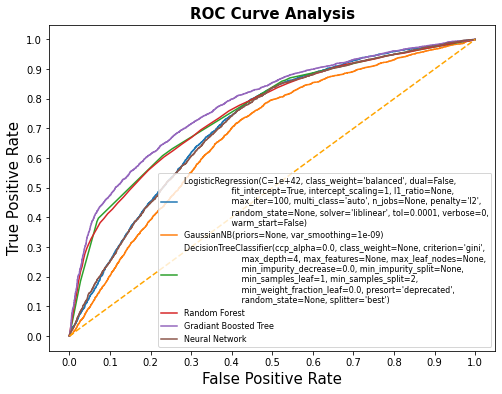

In [51]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve
%matplotlib inline
Classifier = [logit_reg,nb,DecisionTree]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in Classifier:
    yproba = cls.predict_proba(valid_X)[:,1]
    #plot_roc_curve(cls, valid_X, valid_y)
    fpr, tpr, thresholds = roc_curve(valid_y,  yproba)

    auc = roc_auc_score(valid_y, yproba)
    
    result_table = result_table.append({'classifiers':cls,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)
#result_table.fillna(0)
fig = plt.figure(figsize=(8,6))

print(result_table.head())

for i in result_table.index:

    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label=i)
             #label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot(rf_roc.loc[0,:], rf_roc.loc[1,:], label="Random Forest")
plt.plot(gbm_roc.loc[0,:], gbm_roc.loc[1,:], label="Gradiant Boosted Tree")
plt.plot(nn_roc.loc[0,:], nn_roc.loc[1,:], label="Neural Network")

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')

plt.show()

Gradient boosted tree and decision tree performed best. Random forest has overfitting. 

#  Model Selection
While testing the various models, we saw high accuracies, high recall, high precison and high AUC across different models but there wasn't a single model which had all or most metrics which we would have wanted. Thus we had to choose the one which was most relevant to the business case. <br><br>
For the business case presented by Pitney Bowes, identifying the model which would prioritize finding machines which would fail over identifying machines which would not was the priority. Thus we choose the recall score which would prioritize the false negatives over the false positives, i.e. prioritize finding machines which will definitely fail, (thereby minimizing false negatives) and thus allow for some machines to be tagged at high risk to fail while this is not the case(false positives).<br><br>
Among the models we tested, the 2 models with high recall were Logistic Regression and Naive Bayes. Since the Logistic regression had other metrics which were higher compared to Naive Bayes, we have selected the Logistic regression model for the final validation set.

In [56]:
final_prediction = logit_reg.predict(ts1[predictors])

In [60]:
from numpy import savetxt
savetxt('testPred.csv', final_prediction, delimiter=',')

# Model Interpretability
To understand our model and help explain it better, we have used the python package lime to decode the Logistic Regression model



In [63]:
explainer = lime_tabular.LimeTabularExplainer(training_data = np.array(train_X),
                                             mode = "regression",
                                             feature_names = train_X.columns,
                                             categorical_features=[0])

In [64]:
exp = explainer.explain_instance(data_row = valid_X.iloc[4],
                                predict_fn = logit_reg.predict)
exp.show_in_notebook(show_table = True)

In [65]:
exp.as_list()

[('charge_cycle_time_below_12 <= 0.00', -0.41313917115096344),
 ('avg_time_discharging <= 21.46', -0.3020061038758035),
 ('avg_time_charging <= 13.95', 0.2062936100464182),
 ('chargecycles > 95.27', 0.18870791494492778),
 ('dischargecycles > 95.17', -0.1503461911725532),
 ('avg_volt_change_charging > 359.68', 0.09947664149041294),
 ('cycle_time <= 35.44', 0.09063015933653244),
 ('avg_time_charging_lag13 <= 4.72', -0.08693019224297259),
 ('avg_time_charging_lag8 > 29.33', 0.08576727589781392),
 ('avg_time_charging_lag14 <= 4.62', -0.08186528155186108)]

# Takeaways
Based on the results provided by Lime, we can conclude the following:


1.   Features 'charge_cycle_time_below_12' and 'avg_time_discharging' are the biggest indicators if the machines will fail or not in the next 7 days.
2.   Features 'avg_time_charging' and 'chargecycles' being less than 14 and 95 units respecitvely are the biggest indicators that the machines will not fail in the next 7 days.
3. Apart from the above 4 features, the other (relatively smaller) negative predictors are 'dischargecycles', 'avg_time_charging_lag13' and 'avg_time_charging_lag14' whereas the other  (relatively smaller) positive predictors of the machines are 'avg_volt_change_charging', 'cycle_time' and 'avg_time_charging_lag8'

